# <center>Week 3: Logistic regression on Banking Dataset</center>
| **Course:** | **Instructor:** | **Full Name:**| **Student ID:** |**Date:**  |**Term**|
| ----------- | -------------- | ---------------| ----------------|-------    |---------|
| ALY6020     | Prof. Chinthaka Pathum Dinesh Herath Gedara  | Abhilash Dikshit| 002702209       |Jan 26, 2024|Winter |



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix


In [16]:
# Load the dataset from Excel
path = '~/GitProjects/Datasets/Bank_Personal_Loan_Modelling.xlsx'

# Read data from Excel file into a DataFrame
df = pd.read_excel(path)

# Enter the name of the sheet you want to read, or use the index (e.g., 1 for the second sheet)
sheet_name = 'Data'

# Read data from the specified sheet into a DataFrame
df = pd.read_excel(path, sheet_name=sheet_name)

# Display the DataFrame
display(df)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [20]:
# Assume 'Personal Loan' is the target variable, and other columns are features
features = df.drop(['ID', 'Personal Loan'], axis=1)
target = df['Personal Loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Coefficients from Most Significant to Least Significant:
           Feature  Coefficient
            Income     0.035361
             CCAvg     0.001005
          Mortgage     0.000986
         Education     0.000232
            Family     0.000164
        CD Account     0.000132
Securities Account     0.000014
            Online     0.000009
        Experience    -0.000004
        CreditCard    -0.000005
               Age    -0.000025
          ZIP Code    -0.000065




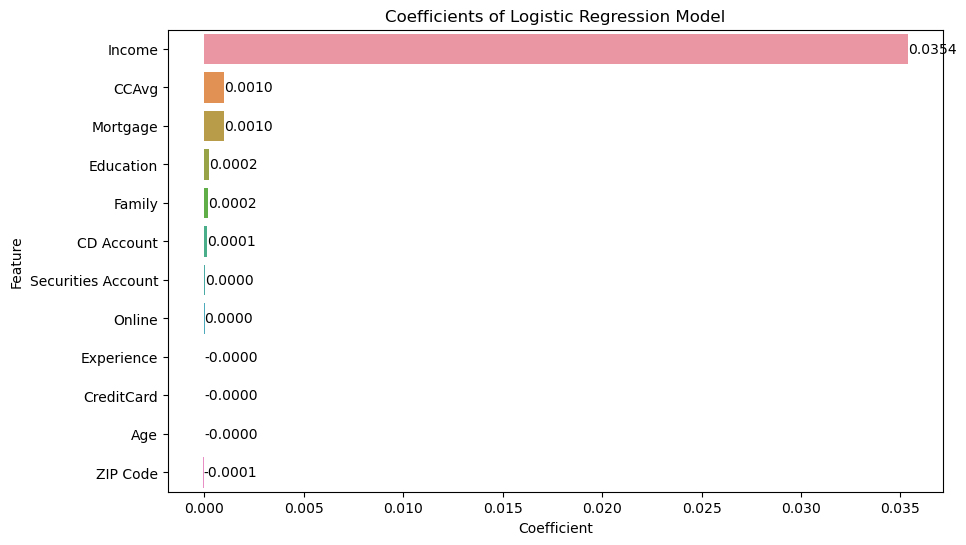

In [25]:
# Get coefficients for each feature
coef_df = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Display coefficients in tabular format
print("Coefficients from Most Significant to Least Significant:")
print(coef_df.to_string(index=False))
print("\n")

# Visualize the coefficients with values at the end of the bars
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient')
plt.ylabel('Feature')

# Annotate the end of each bar with the coefficient values
for index, value in enumerate(coef_df['Coefficient']):
    bar_plot.text(value, index, f'{value:.4f}', va='center', ha='left')

plt.show()

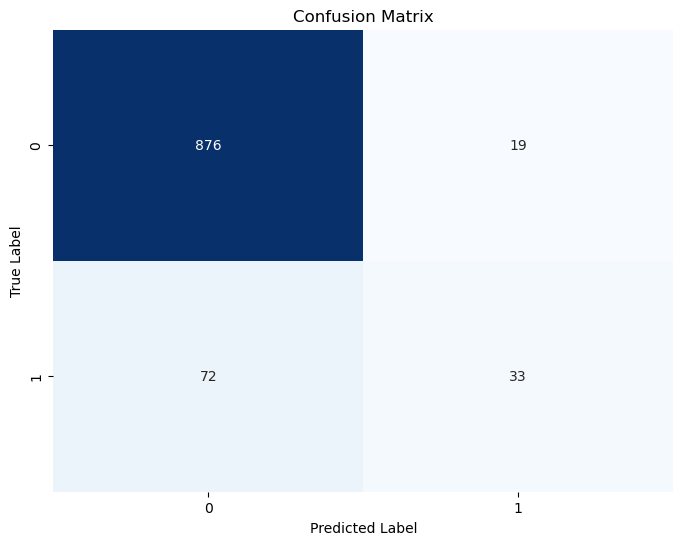

Overall Accuracy: 0.909
Precision Rate: 0.6346153846153846


In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(f"Overall Accuracy: {accuracy}")
print(f"Precision Rate: {precision}")

### What were the three most significant variables?


The three most significant variables, based on their coefficients, are:

Income (Coefficient: 0.035361)

CCAvg (Coefficient: 0.001005)

Mortgage (Coefficient: 0.000986)

### Of those three, which had the most negative influence on loan acceptance?


Among the three most significant variables, the one with the most negative coefficient is Mortgage (Coefficient: 0.000986). 

It's important to note that coefficients represent the change in the log-odds of the dependent variable per one-unit change in the predictor variable. 

In this case, a higher Mortgage value has a negative influence on the likelihood of loan acceptance.

### How accurate was the model overall and what was the precision rate?

1. **Overall Accuracy:**
   The overall accuracy of the model is 0.909 or 90.9%. This means that the model correctly predicted the target variable for approximately 90.9% of the observations in the test set.

2. **Precision Rate:**
   The precision rate of the model is 0.635 or approximately 63.5%. Precision is the proportion of true positive predictions (correctly predicted positives) among all predicted positives. In this case, 63.5% of the instances predicted as positive were actually positive.

These metrics give an indication of how well the logistic regression model performed on the test set.